In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def plot_program_graph(n, program):
    """
    Plotting the bar graph.

    Parameters:
        n (int): n or size value（e.g. 10, 50, 90）
        program (str): program name（e.g. "ecdsa", "fib", "sha2", "ethblock"）
    """
    fixed_order = ["jolt", "jolt-gpu", "risczero", "risczero-gpu", "sp1turbo", "zkm", "nexus", "novanet-with-compressing", "novanet-without-compressing"]
    project_colors = {
        "jolt": "skyblue",
        "jolt-gpu": "blue",
        "risczero": "lightgreen",
        "risczero-gpu": "green",
        "sp1turbo": "plum",
        "zkm": "gold",
        "nexus": "orange",
        "novanet-with-compressing": "pink",
        "novanet-without-compressing": "red",
    }

    file_list = glob.glob(f"{program}_*.csv")
    data = {}

    for file in file_list:
        basename = os.path.splitext(os.path.basename(file))[0]
        if basename.startswith(program + '_'):
            project = basename[len(program)+1:]
        else:
            project = basename.split("_")[1]

        df = pd.read_csv(file)

        if 'n' in df.columns:
            row = df[df['n'] == n]
            if row.empty:
                continue
            time_val = row.iloc[0]['prover time (ms)'] / 1000
        elif 'size' in df.columns:
            row = df[df['size'] == n]
            if row.empty:
                continue
            time_val = row.iloc[0]['proof_duration'] / 1000 / 1000 / 1000
        else:
            continue

        data[project] = time_val

    if not data:
        print(f"Program {program} with n={n} not found.")
        return

    ordered_projects = []
    ordered_times = []
    ordered_colors = []
    for proj in fixed_order:
        if proj in data:
            ordered_projects.append(proj)
            ordered_times.append(data[proj])
            ordered_colors.append(project_colors.get(proj, "gray"))
    remaining_projects = sorted([proj for proj in data.keys() if proj not in fixed_order])
    for proj in remaining_projects:
        ordered_projects.append(proj)
        ordered_times.append(data[proj])
        ordered_colors.append("gray")

    plt.figure(figsize=(len(ordered_projects) * 3, 6))
    bars = plt.bar(ordered_projects, ordered_times, color=ordered_colors)
    plt.title(f"{program} (n={n}) Prover Time")
    plt.xlabel("")
    plt.ylabel("prover time (s)")
    plt.yscale("log")
    plt.grid(True, linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.3f}",
            ha='center',
            va='bottom'
        )

    plt.show()


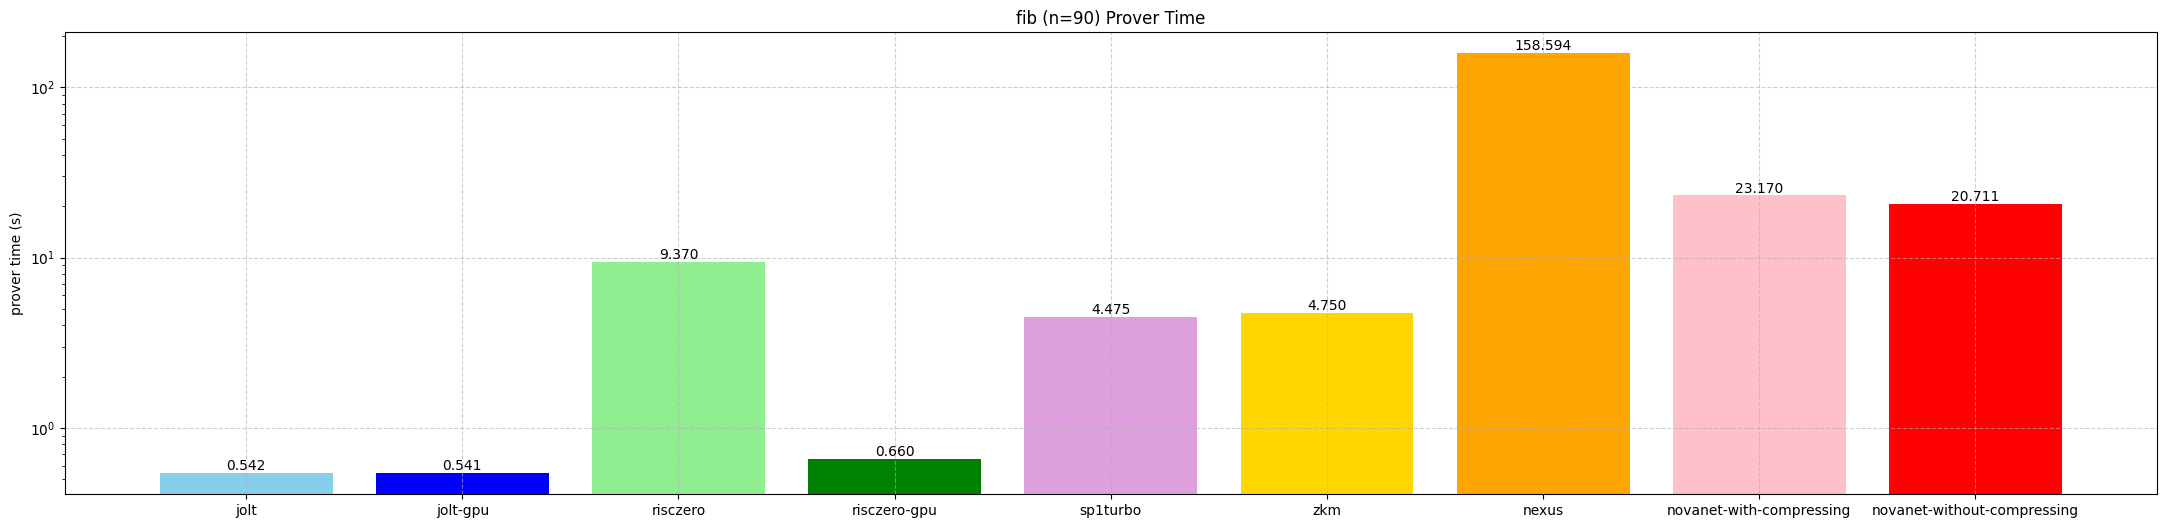

In [6]:
plot_program_graph(90, "fib")

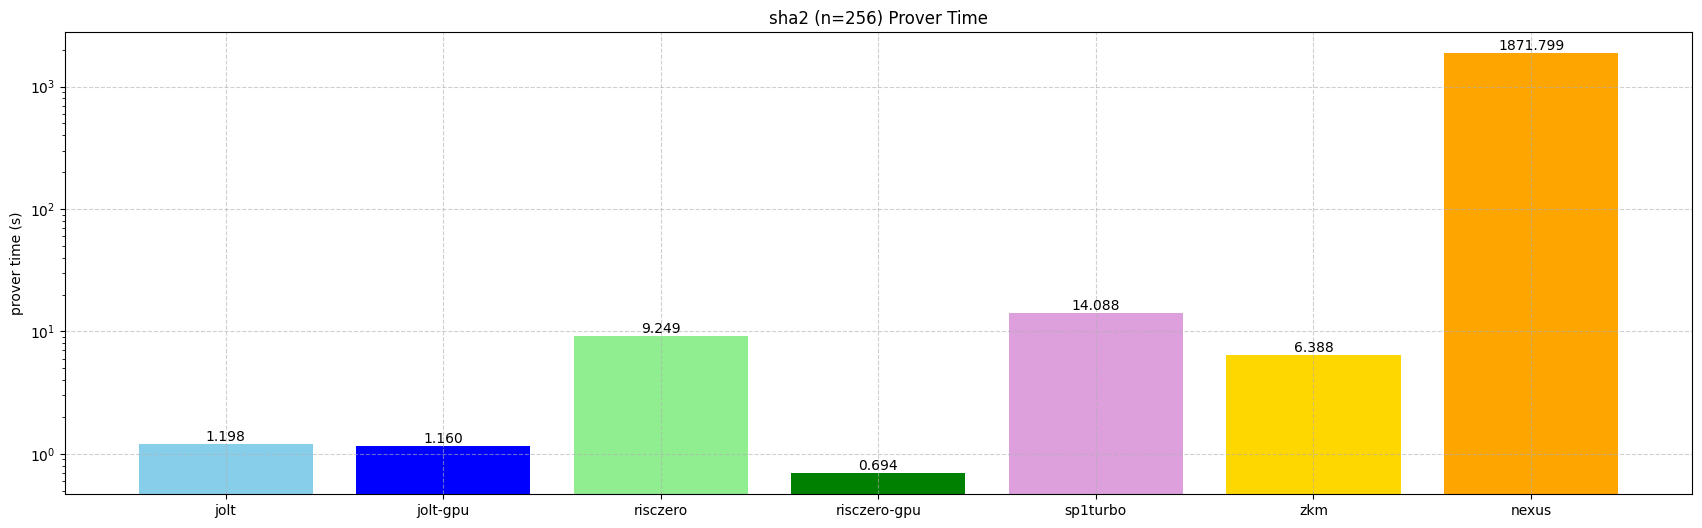

In [7]:
plot_program_graph(256, "sha2")

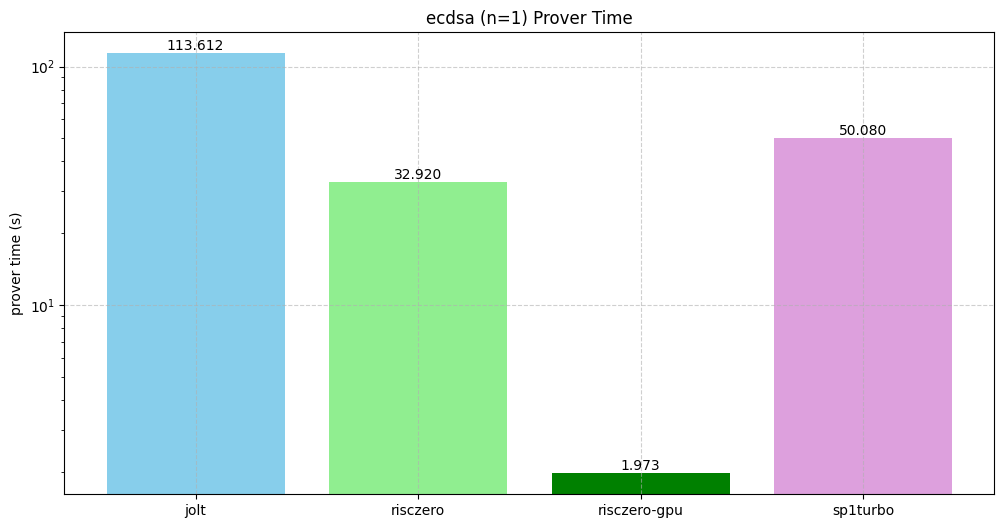

In [8]:
plot_program_graph(1, "ecdsa")

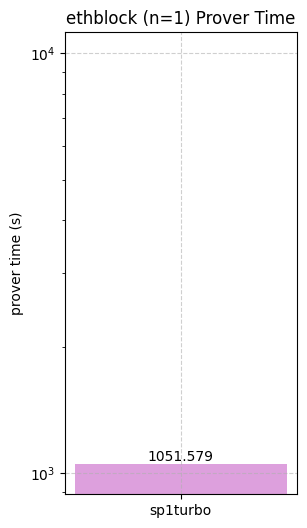

In [9]:
plot_program_graph(1, "ethblock")